# Data Science 
# Assignment '#2 -  Exploratory Data Analysis



In [156]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [157]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We have a list of 10,000 movies with IMDB user rating as imdb.txt. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [158]:
#!head imdb.txt

## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [165]:
# Your code here
data = pd.read_csv('/content/drive/MyDrive/imdb.txt', delimiter='\t', names=['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])


__Marks = 2__

Check the data types of each column

In [160]:
# Your code here
data.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

__Marks = 1__

## 2. Clean the DataFrame

The data frame has several problems

1. The runtime column is stored as a string
2. The genres column has several genres together. This way, it is hard to check which movies are Action movies and so on.
3. The movie year is also present in the title


### Fix the runtime column
Convert the string '142 mins' to number 142.

In [166]:
# Your code here
# data.head()
print(data['runtime'][0])
setRuntime = data['runtime'][0].replace('mins.', '')
print(setRuntime)



142 mins.
142 


__Marks = 3__

Perform this conversion on every element in the dataframe `data`

In [167]:
# Your code here
data['runtime'] = data['runtime'].str.replace('mins.', '').astype(int)
data.head()


<ipython-input-167-5163d817e253>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['runtime'] = data['runtime'].str.replace('mins.', '').astype(int)


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


__Marks = 2__

### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [170]:
#determine the unique genres
genres = data['genres'].str.split('|', expand=True).stack()
sortedGenres = sorted(genres.unique())
print(sortedGenres)

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


__Marks = 4__

Then make a column for each genre

In [171]:
#make a column for each genre
for i in sortedGenres:
  data[i] = data['genres'].str.contains(i)
data.shape
data.head() 

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


__Marks = 5__

### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [172]:
#Strip off last 7 character from title
data['title'] = data['title'].str[:-7]
data['title']

0       The Shawshank Redemption
1                   Pulp Fiction
2                     Fight Club
3                     The Matrix
4                      Inception
                  ...           
9995                     Meduzot
9996              Daltry Calhoun
9997      The Quiller Memorandum
9998                        Taal
9999              The Navigators
Name: title, Length: 10000, dtype: object

__Marks = 1__

## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [173]:
#Call `describe` on relevant columns
allCol = data[['score', 'runtime', 'year', 'votes']]
allCol.describe()

,score,runtime,year,votes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.386070,103.578400,1993.472800,16604.012800
std,1.189933,26.628698,14.829924,34563.459698
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,102.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

Do you see any quantity unusual. Better replace with NAN.

In [174]:
#Your code here
data = data.replace(0, np.nan)
# data.head()

__Marks = 1__

Lets repeat describe to make sure that it is fine

In [175]:
#Your code here
allCol = data[['score', 'runtime', 'year', 'votes']]
allCol.describe()

,score,runtime,year,votes
count,10000.000000,9718.000000,10000.000000,10000.000000
mean,6.386070,106.584071,1993.472800,16604.012800
std,1.189933,20.230586,14.829924,34563.459698
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2333.750000
50%,6.600000,103.000000,1998.000000,4980.500000
75%,7.200000,115.000000,2005.000000,15277.750000
max,9.200000,450.000000,2011.000000,619479.000000


__Marks = 1__

### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

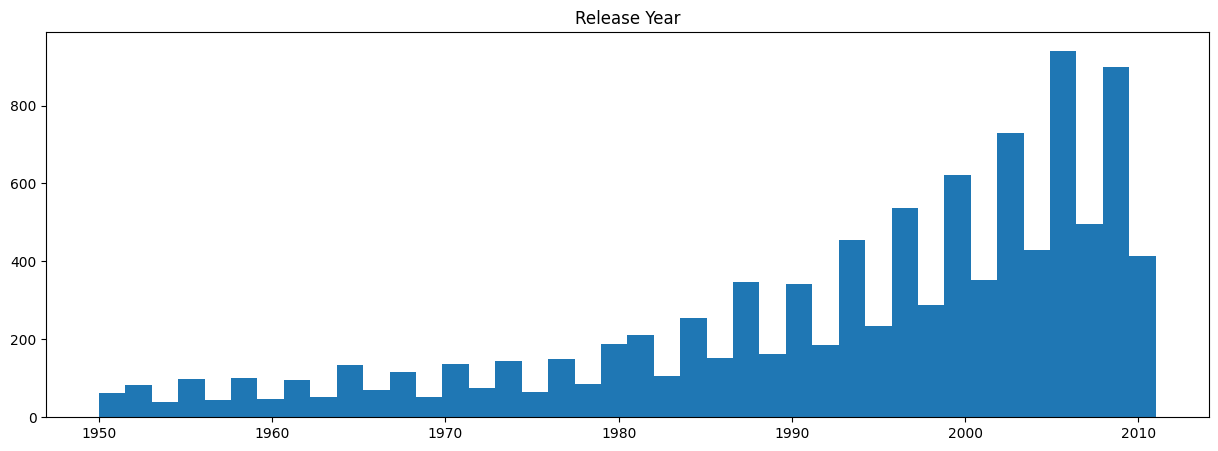

In [176]:
#Your code here
plt.figure(figsize=(15, 5))
plt.title("Release Year")
plt.hist(data['year'], bins=40)
plt.show()

__Marks = 1__

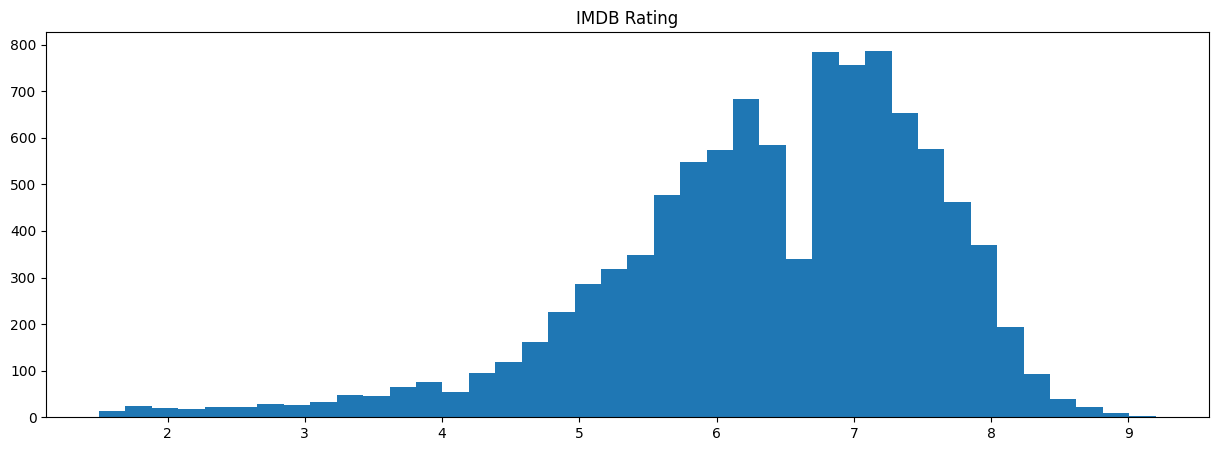

In [177]:
#Your code here
plt.figure(figsize=(15, 5))
plt.title("IMDB Rating")
plt.hist(data['score'], bins=40)
plt.show()

__Marks = 1__

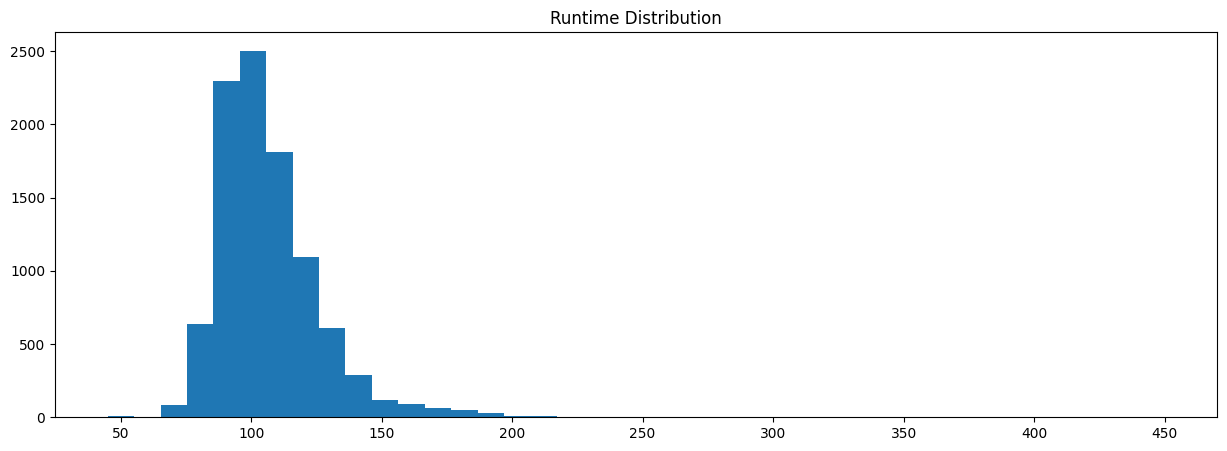

In [178]:
#Your code here
plt.figure(figsize=(15, 5))
plt.title("Runtime Distribution")
plt.hist(data['runtime'], bins=40)
plt.show()

__Marks = 1__

Scatter plot between IMDB rating and years. Does it shows some trend?

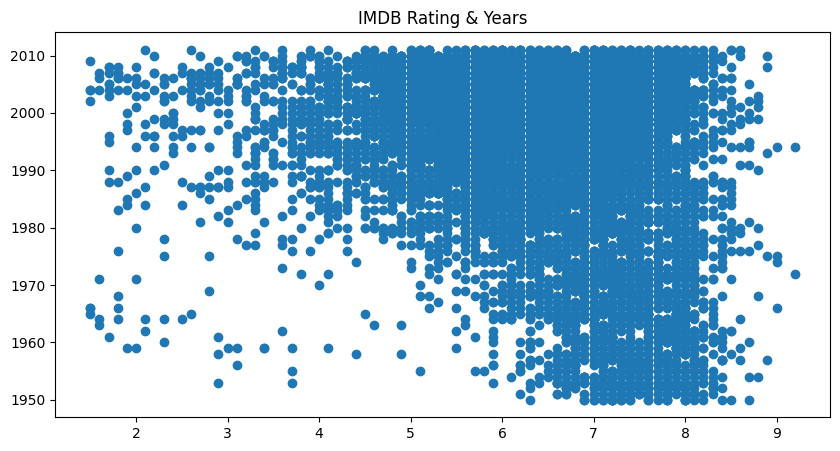

In [179]:
#Your code here
plt.figure(figsize=(10, 5))
plt.title("IMDB Rating & Years")
plt.scatter(data['score'], data['year'])
plt.show()

__Marks = 2__

Is there any relationship between IMDB rating and number of votes? Describe

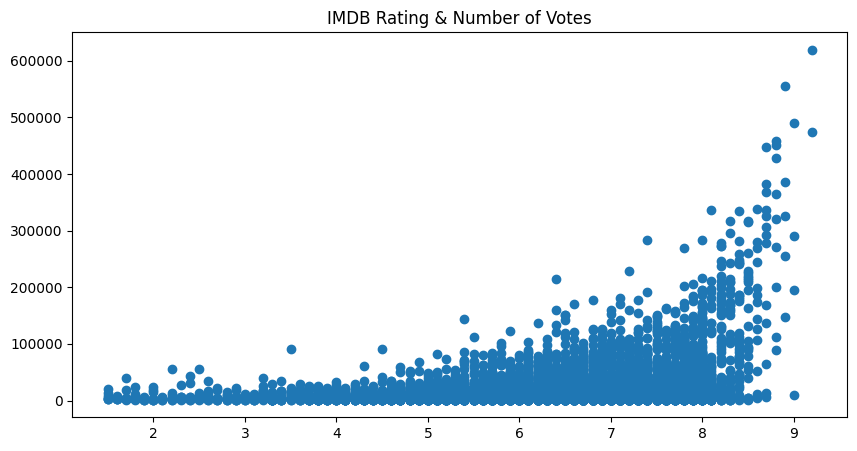

In [180]:
#Your code here
plt.figure(figsize=(10, 5))
plt.title("IMDB Rating & Number of Votes")
plt.scatter(data['score'], data['votes'])
plt.show()

__Marks = 2__

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [181]:
#Your code here
#sum sums over rows by default
# print(type(sortedGenres))
frequentGenres = data[sortedGenres].sum().sort_values(ascending=False)
print(frequentGenres)

Drama         5697
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1867
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
Music          619
War            512
Biography      394
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
News             1
Reality-TV       1
dtype: object


__Marks = 2__

Draw a bar plot to show top ten genres

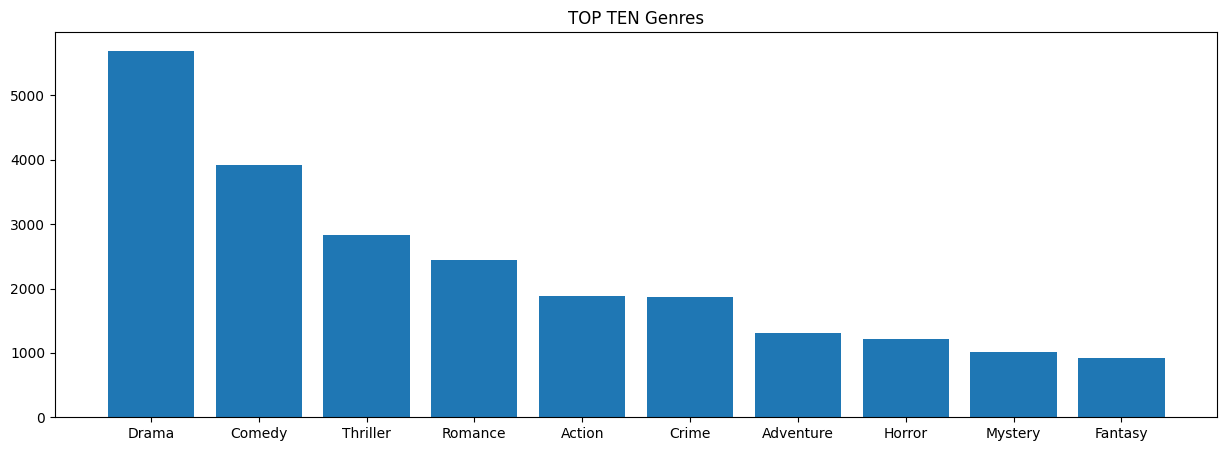

In [182]:
#Your code here
plt.figure(figsize=(15, 5))
plt.title("TOP TEN Genres")
plt.bar(frequentGenres.head(10).index, frequentGenres.head(10)) #top ten
plt.show()

__Marks = 2__

*How many genres does a movie have, on average?*

In [183]:
#Your code here
#axis=1 sums over columns instead
data[sortedGenres].sum(axis=1).mean()

2.7785

__Marks = 2__

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=score-year-plot.png>

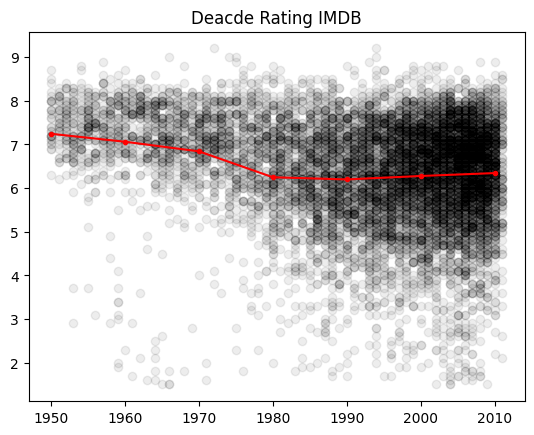

In [185]:
#Your code here
plt.title('Deacde Rating IMDB')
data['decade'] = data['year'].apply(lambda x: (x // 10) * 10)
rating = data.groupby('decade')['score'].mean()
plt.plot(rating.index, rating.values, marker='.', color='red', linestyle='-')
plt.scatter(data['year'], data['score'], alpha=0.07, color='black')
plt.show()

__Marks = 5__

Find the most popular movie each year


In [186]:
#Your code here
sortedData = data.sort_values(['year', 'score'])
print(sortedData)

         imdbID                                         title  year  score  votes  runtime                           genres Action Adult Adventure Animation Biography Comedy Crime Drama Family Fantasy Film-Noir History Horror Music Musical Mystery News Reality-TV Romance Sci-Fi Sport Thriller  War Western  decade
8844  tt0042179     Abbott and Costello in the Foreign Legion  1950    6.3   1722     80.0                 Adventure|Comedy    NaN   NaN      True       NaN       NaN   True   NaN   NaN    NaN     NaN       NaN     NaN    NaN   NaN     NaN     NaN  NaN        NaN     NaN    NaN   NaN      NaN  NaN     NaN    1950
7369  tt0042646                          King Solomon's Mines  1950    6.9   2398    103.0         Adventure|Romance|Action   True   NaN      True       NaN       NaN    NaN   NaN   NaN    NaN     NaN       NaN     NaN    NaN   NaN     NaN     NaN  NaN        NaN    True    NaN   NaN      NaN  NaN     NaN    1950
8196  tt0042327                          Cheaper by the

__Marks = 2__